## Bienvenidos a Titanic Spaceship
JALAL KADDOURA 

Titanic Spaceship es un dataset de ejemplo creado para trabajar modelos de machine learning.  El dataset tiene diferentes columnas que informan practicamente la persona de que planeta se originio y hacia donde se dirigio.  El resultado es si la persona fue transportada o no.

##### Importacion de librerias

Importe las librerias iniciales para procesamiento de datos y de descompresion de archivos

In [4]:
#importe la librerias pandas como pd
import pandas as pd
#importe ZipFile de la libreria zipfile
from zipfile import ZipFile

In [5]:
# observamos los archivos que estan en esta carpeta
import os

os.listdir("/app/ArtificialIntelligence/Tarea/Tarea 1")

['.ipynb_checkpoints',
 'Example.ipynb',
 'spaceship-titanic.zip',
 'test.csv',
 'train.csv']

Preparamos para ud una funcion para descomprimir el dataset que esta en la carpeta

In [6]:
# funcion utilitaria para extraer data
def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

Llamando a la funcion anterior e ingresando el archivo zip los podemos descomprimir programaticamente

In [7]:
# llame la función anterior y extraiga el archivo spaceship-titanic
unzip_data("/app/ArtificialIntelligence/Tarea/Tarea 1/spaceship-titanic.zip")

Ahora utilizando la función read_csv podemos leer tanto el archivo de training como el de test set

In [8]:
# utilice read_csv de pandas para leer lotest_ds = pd.read_csv("test.csv")
train_ds = pd.read_csv("train.csv")
test_ds = pd.read_csv("test.csv")

Observamos las primeras 5 líneas del archivo de training

In [9]:
# con pandas, observe los primeros 5 datos con la funcion head()
train_ds.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Observamos las primeras 5 lineas del archivo de test set.  Note que la columna **Transported** no esta en esta parte, es la columna que vamos a predecir, este caso es especial debido a que este dataset es de un concurso de kaggle.

In [10]:
# con pandas, observe los primeros 5 datos del dataset de prueba
test_ds.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Ahora hacemos un poco de analisis basico para saber cuantos datos tenemos de training y cuantos datos tenemos de test

In [11]:
# calcule la cantidad de filas del training set y del test set
ntrain = train_ds.shape[0]
ntest = test_ds.shape[0]

#imprima la cantidad de datos del training set y del test set
print(f'Dataset has {ntrain} train samples')
print(f'Dataset has {ntest} test samples')

Dataset has 8693 train samples
Dataset has 4277 test samples


Nos interesa tambien observar el tipo de datos del dataset

In [12]:
train_ds.info()
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

Revisamos tambien si poseemos valores nulos

In [13]:
# revise si existen campos nulos en el training set con isnull y sum
train_ds.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Damos una funcion basica de imputacion de datos, este busca los datos nulos y los reemplaza por el dato mas frecuente, hay otras maneras de preprocesar datos como por valores medios, anteriores, etc.

In [14]:
# funcion que realiza los reemplazos del dato mas frecuente en la columna (imputer)
def impute_most_frequent_data(df):
    for column_name in df.columns:
        data = df[column_name].value_counts().index[0]
        df[column_name].fillna(data, inplace=True)
    return df

Llamamos la funcion contra el train_ds

In [15]:
# llame la funcion contra el training set
train_ds = pd.read_csv("train.csv")
train_ds.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Revisamos nuevamente si poseemos valores nulos

In [16]:
# valide nuevamente si existen campos nulos
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Agrupamos por las columnas 'HomePlanet' y 'VIP' y realizamos la suma de los datos para saber la frecuencia

In [17]:
# Agrupe por planeta y adquiera la columna VIP
home_planet_vs_vip = train_ds.groupby("HomePlanet")["VIP"].sum()
home_planet_vs_vip

HomePlanet
Earth       0
Europa    131
Mars       63
Name: VIP, dtype: object

Realizamos una visualziación básica de gráfico de barras para ver los datos anteriores de una manera mas manejable

In [18]:
train_ds[train_ds["HomePlanet"] == "Earth"]["VIP"].value_counts(dropna=False)


VIP
False    4487
NaN       115
Name: count, dtype: int64

/tmp/ipykernel_119/1838899224.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(home_planet_vs_vip.index, rotation=45)


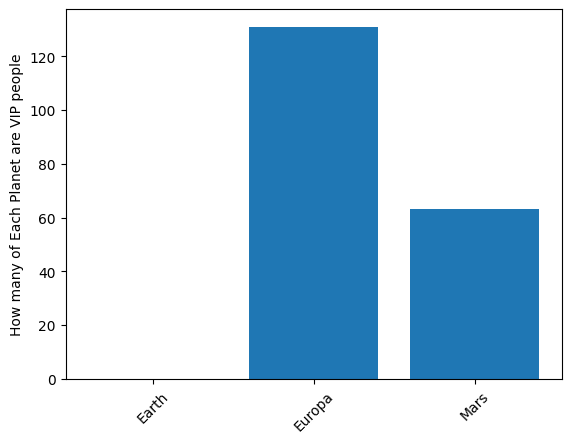

In [19]:
# Genere un grafico de barras donde
# x = 'HomePlanet'
# y = cantidade de personas que fueron VIP
# rote los labels a 45°

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(home_planet_vs_vip.index, home_planet_vs_vip.values)
ax.set_xticklabels(home_planet_vs_vip.index, rotation=45)
ax.set_ylabel("How many of Each Planet are VIP people")
plt.show()

Agrupamos por edad y tambien todas las columnas numericas, sumamos para saber cuanto gastaron por rango de edad

In [20]:
# agrupe por edad y sume para saber cuanto por rango de edad gastaron cada uno
age_vs_moneyspent = train_ds.groupby("Age")[[ "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum()
age_vs_moneyspent

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
75.0,0.0,493.0,1224.0,131.0,1901.0
76.0,0.0,2732.0,422.0,16594.0,330.0
77.0,0.0,9032.0,131.0,4109.0,1572.0


Realizamos un gráfico de dispersión para ver cuanto gastan por edad

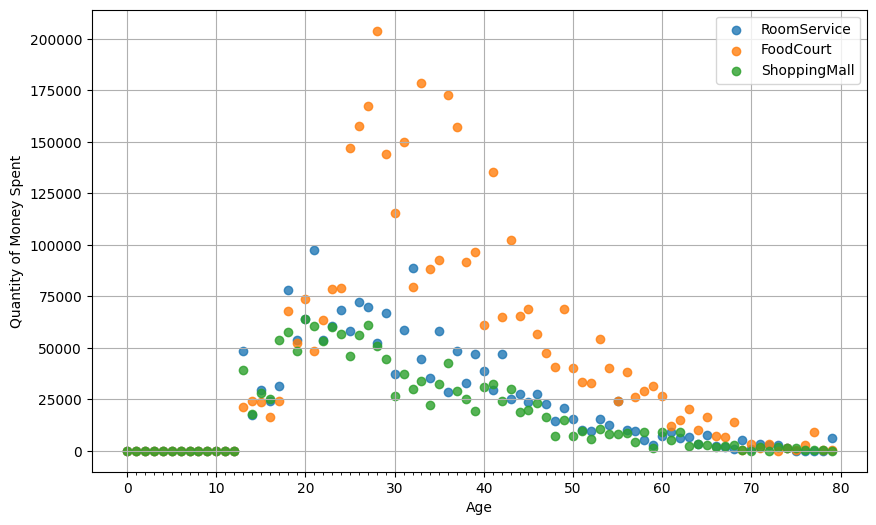

In [21]:
##### Realize un gráfico de dispersion para ver la cantidad gastada por rango de edades
fig, ax = plt.subplots(figsize=(10,6))
for i in range(len(age_vs_moneyspent.columns)-2):
    ax.scatter(age_vs_moneyspent.index, age_vs_moneyspent.iloc[:, i], alpha=0.8)
    ax.legend(age_vs_moneyspent.columns)
ax.set_xlabel("Age")
ax.set_xticks(ticks=range(0,80), minor=True)
ax.set_ylabel("Quantity of Money Spent")
ax.grid()

plt.show()

Realizamos un grafico de histograma para ver la distribución de destinos contra las observaciones

/tmp/ipykernel_119/3552906982.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


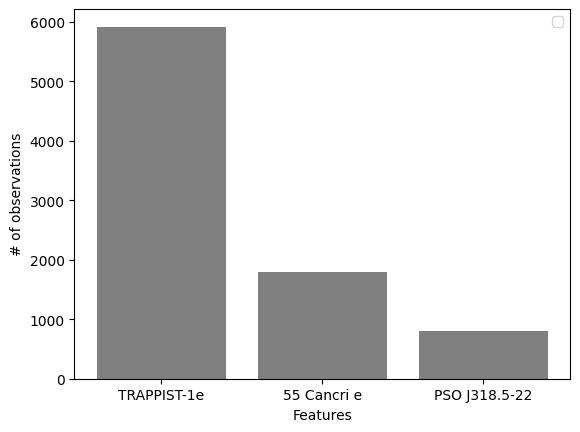

In [22]:
import matplotlib.pyplot as plt

# realice un grafico de histograma para los destinos versus las características
fig, ax = plt.subplots()
ax.bar(train_ds['Destination'].value_counts().index, train_ds['Destination'].value_counts().values, color='gray')
ax.set_xlabel("Features")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()


### Machine Learning

Realizaremos un modelo de machine learning sencillo, pero primero necesitamos componer los datos categoricos a numericos.  La mayoria de los problemas de machine learning utilizan datos numericos o boleanos para realizar sus algoritmos

Primeramente importamos OneHotEncoder para codificar las columans

In [56]:
# de sklearn la librería preprocessing importe OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

Ayudamos a realizar una función de encoding de las columnas

In [57]:
# llame a la funcion utilizando el traning set y listando las librerías categoricas 'HomePlanet' y 'Destination'
def column_transform(df, categorical_columns):
    for col in categorical_columns:
        col_ohe = pd.get_dummies(df[col], prefix=col)
        df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)
    return df

Asigne a train_ds_ohe la funcion y los datos categoricos a filtrar

In [58]:
train_ds_ohe = column_transform(df=train_ds, categorical_columns=['HomePlanet', 'Destination'])
train_ds_ohe.head()


,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


Realice la asignacion de las caracteristicas a la variable 'X' y el objetivo a encontrar a la variable 'y', en este caso son las personas transportadas

In [59]:
# deshagase con drop() de las columnas 'PassengerId', 'Cabin', 'Name' y 'Transported'
# asignela a la variable X
X = train_ds_ohe.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)

# asigne del train_ds_ohe solamente la columna transported a la variable y
y = train_ds_ohe['Transported']

Importamos nuevas librerias necesarias y funciones

In [60]:
# de sklearn linear_model importe SGDClassifier
from sklearn.linear_model import SGDClassifier
# de sklearn preprocessing importe StandardScaler y make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Realizamos un clasificador

In [67]:
from sklearn.impute import SimpleImputer

# llame a make_pipeline con:
# StandardScaler()
# SGDClassifier con max_iter=1000, tol=1e-3
clf = make_pipeline(SimpleImputer(strategy='mean'),
                    StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
# llame al metodo fit() del clasificador
clf.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

Antes de realizar predicciones tenemos que preprocesar la entrada, lo único que no tenemso que hacer es volver a escalar la información con StandardScaler debido a que el modelo lo hace por nosotros.

In [68]:
# funcion para preprocesar la data antes de realizar predicciones, note que no hacemos escalamientos
def preprocess_test_set(test_df):
    test_df = column_transform(df=test_df, categorical_columns=['HomePlanet','Destination'])
    test_df = test_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    return impute_most_frequent_data(test_df)

Realizamos el llamado de la funcion anterior con el argumento del test dataset

In [69]:
# llame la funcion anterior con el test dataset
test_data = column_transform(df=test_ds, categorical_columns=["HomePlanet", "Destination"])

Calculamos las predicciones

In [71]:
# calcule las predicciones del clasificador con el metodo predict
test_data_processed = test_data.drop(["PassengerId", "Cabin", "Name"], axis=1)
y_pred = clf.predict(test_data_processed)


Ahora imprimimos de alguna manear para contar cuantas fueron predicciones o personas que llegaron al destino o no

In [72]:
# transforme las predicciones en un dataframe y calcule cuantas predicciones
# fueron pasajeros transportados y cuales no fueron transportados
predictions_df = pd.DataFrame(y_pred, columns=["Transported_Prediction"])

# Calcula el conteo de cada valor (True/False)
prediction_counts = predictions_df["Transported_Prediction"].value_counts()

# Imprime los resultados
print("Conteo de predicciones:")
print(prediction_counts)

Conteo de predicciones:
Transported_Prediction
True     2317
False    1960
Name: count, dtype: int64


Hasta este punto solo hemos visto como preprocesar la data y realizar un modelo.  

Adicionalmente como preprocesar la data de salida antes de consumir a un modelo.  No hemos visto aún como guardar o recargar un modelo y también como podemos ajustarlo y tener mejores métricas.

Lo anteriormente dicho lo veremos cuando estemos realizando el laboratorio 1.